# **Is Netflix Still Worth It? A Data-Driven Exploration of My Viewing Habits**

In this project, I will explore my own viewing habits on the Netflix platform. The analysis will focus on answering the following questions:

* What are the top 10 most viewed content by counting of views and by total hours viewed?
* What are my viewing habits, such as the day of the week, time of day, and part of the month I watch the most content, as well as identifying the show I watch the most?
* What is the cost per hour viewed per month, and is it really worth it for me to keep paying for Netflix?

Through this data analysis project, I aim to gain insights into my own Netflix consumption and draw meaningful conclusions from my viewing habits.

## **1. Library Imports:**
In this section, we will import the necessary libraries for our analysis.


In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

## **2. Data Import:** 

In this section, we will import the Netflix dataset from a CSV file and create a DataFrame object.


In [47]:
# Importing CSV 
netflix_df = pd.read_csv('/Users/paulofolly/Documents/DS/VSCODE/PYTHON/python_datacamp/Projetos/project_netflix/netflix_data_report/CONTENT_INTERACTION/ViewingActivity.csv')
# Inspect CSV
netflix_df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Kids,2023-01-17 15:16:18,00:00:08,Autoplayed: user action: None;,The Boss Baby: Back in Business: Season 3 (Cli...,HOOK,LG DTV 2022 MTK LM21A UHD TV Smart TV,00:00:08,00:00:08,BR (Brazil)
1,Kids,2023-01-17 15:15:52,00:00:12,Autoplayed: user action: None;,Próxima Parada: Lar Doce Lar (Clipe): Próxima ...,HOOK,LG DTV 2022 MTK LM21A UHD TV Smart TV,00:00:12,00:00:12,BR (Brazil)
2,Kids,2022-05-23 17:17:38,00:00:06,Autoplayed: user action: None;,Galinha Pintadinha Mini: Season 1_hook_primary...,HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:06,00:00:06,BR (Brazil)
3,Kids,2022-01-16 04:21:41,00:00:40,Autoplayed: user action: Unspecified;,Hilda: Temporada 1: Capítulo 1: As pessoas esc...,NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:11:43,00:11:43,BR (Brazil)
4,Kids,2022-01-16 00:43:30,00:01:40,NaN,Próxima Parada: Lar Doce Lar,NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:43:33,00:43:33,BR (Brazil)


## **3. Data Cleaning:**

In this section, we will perform preliminary data cleaning to ensure the data is ready for analysis.

In [48]:
# Selecting only the columns of interest
nx_df = netflix_df[['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title', 'Device Type', 'Supplemental Video Type']]

# Inspecting selection
nx_df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Device Type,Supplemental Video Type
0,Kids,2023-01-17 15:16:18,00:00:08,Autoplayed: user action: None;,The Boss Baby: Back in Business: Season 3 (Cli...,LG DTV 2022 MTK LM21A UHD TV Smart TV,HOOK
1,Kids,2023-01-17 15:15:52,00:00:12,Autoplayed: user action: None;,Próxima Parada: Lar Doce Lar (Clipe): Próxima ...,LG DTV 2022 MTK LM21A UHD TV Smart TV,HOOK
2,Kids,2022-05-23 17:17:38,00:00:06,Autoplayed: user action: None;,Galinha Pintadinha Mini: Season 1_hook_primary...,Netflix Chrome MAC (Cadmium) HTML 5,HOOK
3,Kids,2022-01-16 04:21:41,00:00:40,Autoplayed: user action: Unspecified;,Hilda: Temporada 1: Capítulo 1: As pessoas esc...,Samsung 2017 Kant-M UHD TV Smart TV,NaN
4,Kids,2022-01-16 00:43:30,00:01:40,NaN,Próxima Parada: Lar Doce Lar,Samsung 2017 Kant-M UHD TV Smart TV,NaN


## **4. Data Formatting:**

In this section, we will convert the "Start time" and "Duration" columns from string format to datetime and timedelta formats, respectively.


In [49]:
# Using pd.to_ to convert the data to correct format
nx_df_copy = nx_df.copy()
nx_df_copy['Start Time'] = pd.to_datetime(nx_df_copy['Start Time'])
nx_df_copy['Duration'] = pd.to_timedelta(nx_df_copy['Duration'])


## **5. Preliminary Analysis:** 

In this section, we will begin our analysis by answering the following question:

* #### **What are the top 15 most viewed content, ranked by count of views and total hours viewed?**

#### **5.1 Top 15 Most Viewed Content: Count of Views and Total Hours Viewed**


5.1.1 Top 10 Most Viewed Content by View Count: 

In this subsection, we will rank the top 15 most viewed content by counting the number of views for each content.

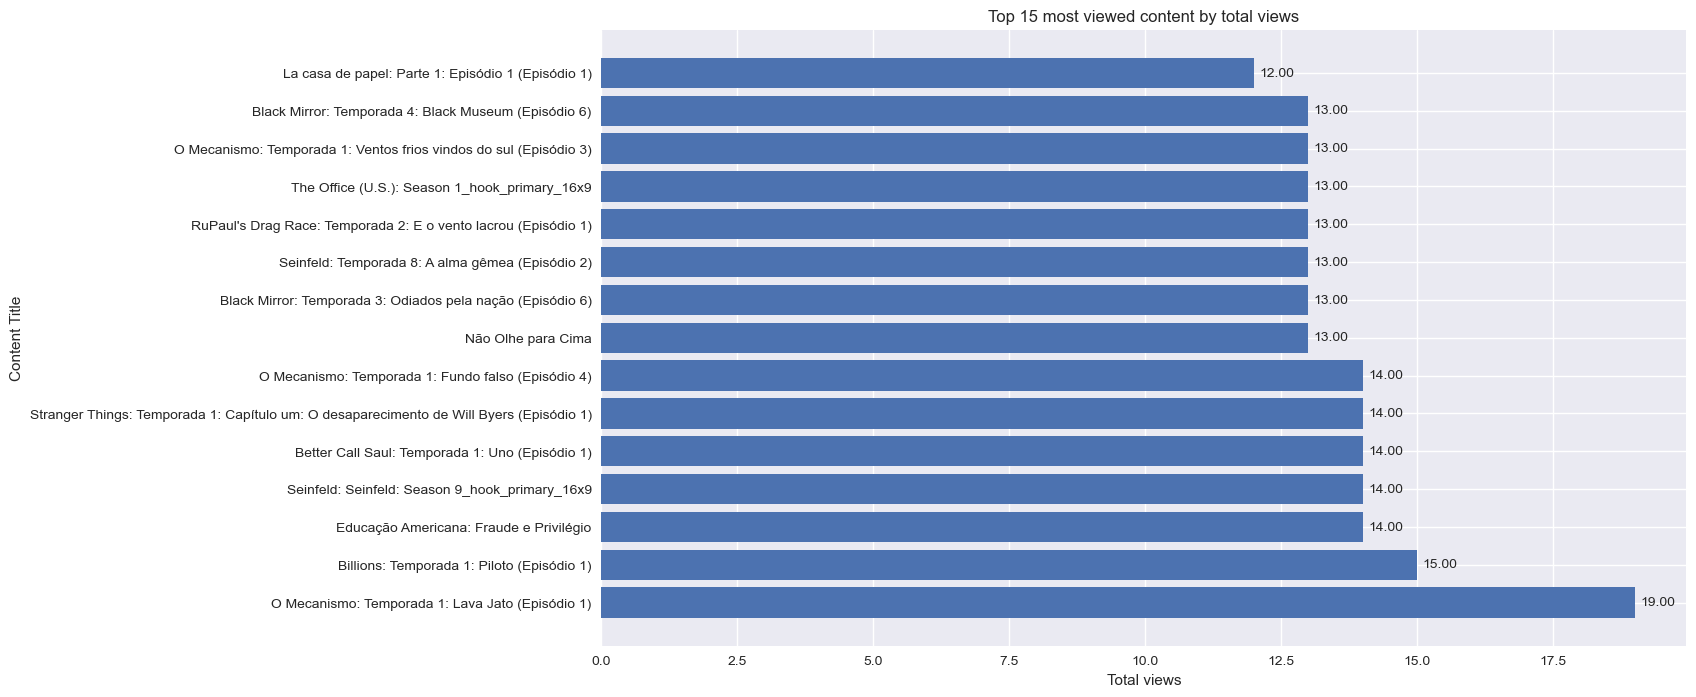

In [50]:
# Count the number of times each title appears
title_counts = nx_df['Title'].value_counts()

# Get the top n most frequently watched titles
top_n_titles = title_counts.head(15)

# Define the plot style
plt.style.use('seaborn')

# Create a horizontal bar chart of the top n titles
fig, ax = plt.subplots(figsize=(14, 8))
bar_plot = ax.barh(top_n_titles.index, top_n_titles.values)

# Set chart title and labels
ax.set_title('Top 15 most viewed content by total views')
ax.set_xlabel('Total views')
ax.set_ylabel('Content Title')

# Add data labels
for i, v in enumerate(top_n_titles.head(15).values):
    bar_plot[i].set_width(v)
    ax.text(v + 0.1, i, f'{v:.2f}', va='center')

# Show the chart
plt.show()

5.1.2 Top 10 Most Viewed Content by Total Viewing Time:

In this subsection, we will rank the top 15 most viewed content by calculating the total viewing time for each content.

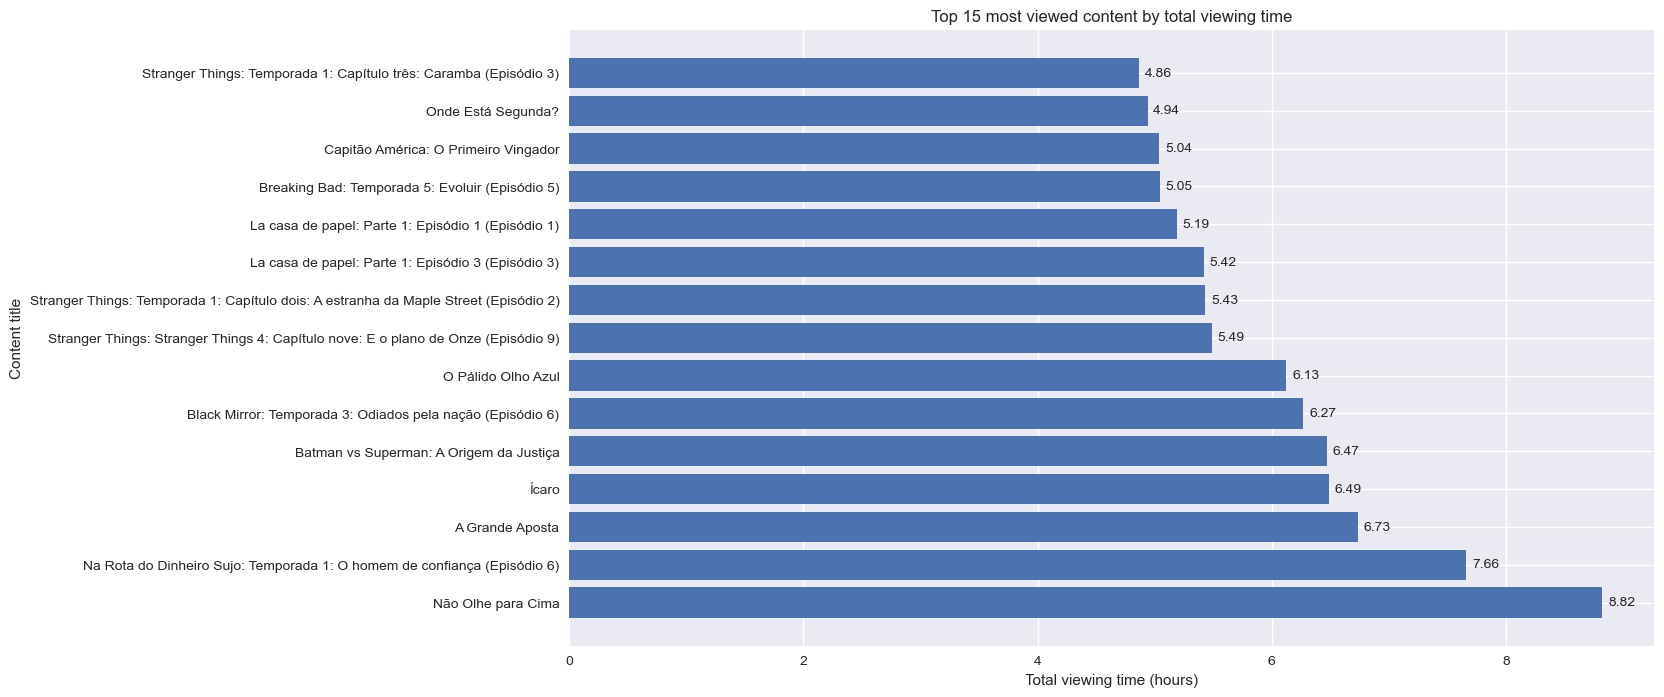

In [62]:
# Convert 'Start Time' and 'Duration' columns to datetime and Timedelta respectively
nx_df.loc[:, 'Start Time'] = pd.to_datetime(nx_df['Start Time'])
nx_df.loc[:, 'Duration'] = pd.to_timedelta(nx_df['Duration'])

# Grouping the data by title and start time
grouped = nx_df.groupby(['Title', pd.Grouper(key='Start Time', freq='D')])

# Summing the duration column to get total viewing time for each episode
top_10_time = grouped['Duration'].sum()

# Convert Timedelta to float representing total hours viewed
top_10_time = top_10_time.apply(lambda x: x.total_seconds() / 3600)

# Grouping the data by title, sum the episode viewing times to get total viewing time for each content
viewing_duration_top = top_10_time.groupby(level=0).sum()

# Sorting by total viewing time in descending order
viewing_duration_top = viewing_duration_top.sort_values(ascending=True)

# Set the pattern for the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 8))
bar_plot = ax.barh(viewing_duration_top.tail(15).index, viewing_duration_top.tail(15).values, align='center')

# Set chart title and labels
ax.set_title('Top 15 most viewed content by total viewing time')
ax.set_xlabel('Total viewing time (hours)')
ax.set_ylabel('Content title')
ax.invert_yaxis()

# Set the width of each bar and add the value to the right of each bar
for i, v in enumerate(viewing_duration_top.tail(15).values):
    bar_plot[i].set_width(v)
    ax.text(v + 0.05, i, f'{v:.2f}', va='center')

# Show the chart
plt.show()


The first analysis that can be made is that there is some overlap between the lists of most watched content in views and hours, but there are also significant differences. TV series dominate the list of most watched content in views, while movies dominate the list of most watched content in hours. This is due to the fact that TV series have a shorter duration than movies, but may have a more loyal fan base. The popularity of the content may also contribute to the difference between the two lists.

#### **5.2 Groupped TV Show Episodes: Count of Views and Total Hours Viewed** 

Since subsection 5.1 showed that our dataset contains a significant number of TV show episodes, we will now group them together to determine the most viewed TV show in terms of both view count and total viewing time. This will provide us with a more comprehensive understanding of which TV shows are the most popular on our Netflix dataset.

**5.2.1 TV Shows with Most Views:**

In this subsection, we will rank the TV shows by the number of views to determine which shows are the most popular among viewers.

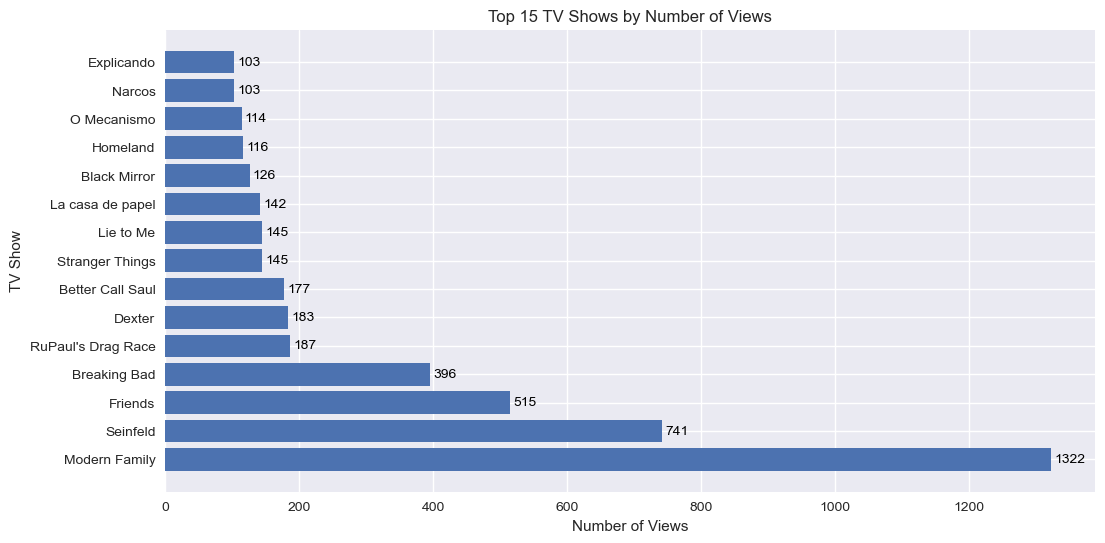

In [52]:
# Create a copy of the DataFrame 
nx_df_copy = nx_df.copy()

# Extracting TV show titles from the 'Title' column and remove episode numbers
nx_df_copy.loc[:, 'TV Show Title'] = nx_df_copy['Title'].str.replace(r':.*?(Parte|Temporada|Season|Episódio|Part|Episode) \d+.*$', '', regex=True)

# Counting the number of views for each TV show
tv_show_count = nx_df_copy.loc[nx_df_copy['TV Show Title'].notnull()].groupby('TV Show Title').size().reset_index(name='Count')

# Sorting the result in descending order
tv_show_count = tv_show_count.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Creating a horizontal bar chart of the top 10 TV shows by number of views
fig, ax = plt.subplots(figsize=(12, 6))
bar_plot = ax.barh(tv_show_count['TV Show Title'][:15], tv_show_count['Count'][:15])

# Setting chart title and labels
ax.set_title('Top 15 TV Shows by Number of Views')
ax.set_xlabel('Number of Views')
ax.set_ylabel('TV Show')

# Setting the width of each bar to match the number of views and adding text labels
for i, v in enumerate(tv_show_count['Count'][:15]):
    bar_plot[i].set_width(v)
    ax.text(v + 5, i, str(v), color='black', va='center')

# Show the chart
plt.show()


**5.2.2 TV Shows with Most Viewing Time:** 


In this subsection, we will rank the TV shows by total viewing time to see which shows have been viewed the most.

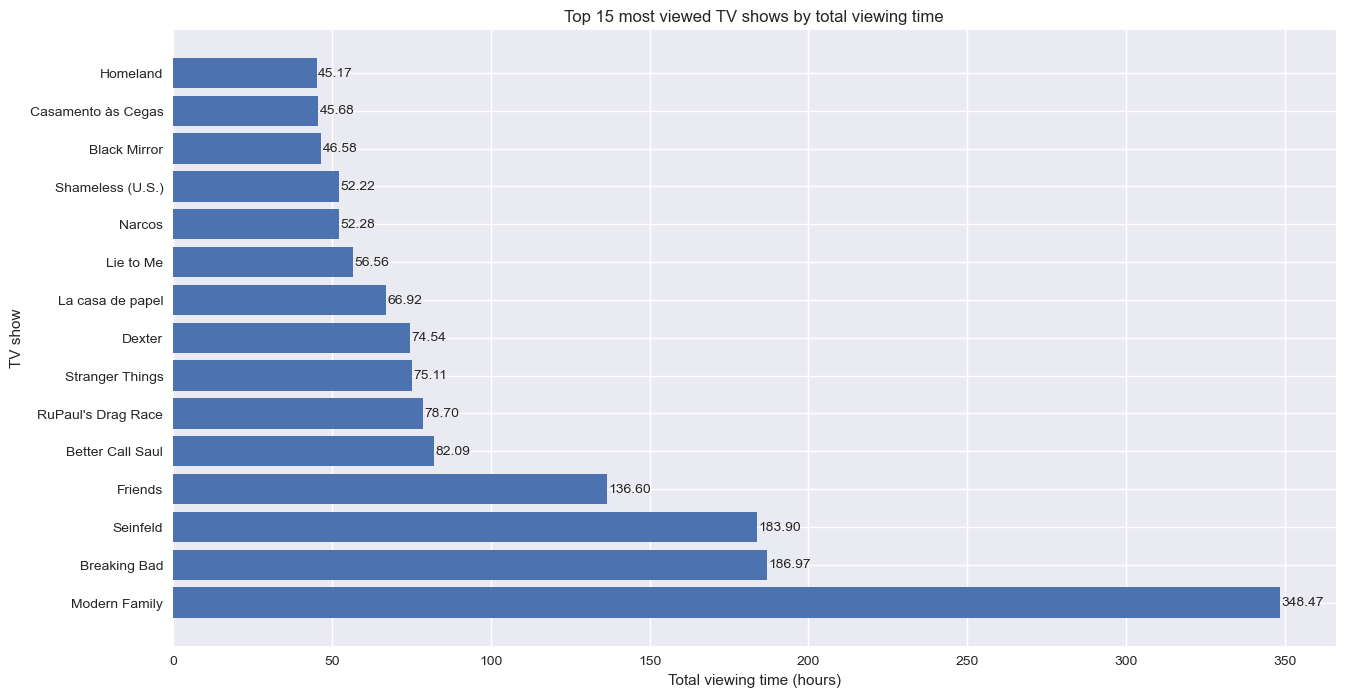

In [53]:
# Grouping the data by TV show title and start time
grouped = nx_df_copy.groupby(['TV Show Title', pd.Grouper(key='Start Time', freq='D')])

# Summing the duration column to get total viewing time for each episode
episodes = grouped['Duration'].sum()

# Convert Timedelta to float representing total hours viewed
episodes = episodes / pd.Timedelta(hours=1)

# Grouping the data by TV show title, sum the episode viewing times to get total viewing time for each content
viewing_times = episodes.groupby(level=0).sum()

# Sorting by total viewing time in descending order
viewing_times = viewing_times.sort_values(ascending=True)

# Plotting a horizontal bar chart of the top 15 most viewed TV shows by total viewing time
fig, ax = plt.subplots(figsize=(15,8))
bar_plot = ax.barh(viewing_times.tail(15).index, viewing_times.tail(15).values, align='center')
ax.set_xlabel('Total viewing time (hours)')
ax.set_ylabel('TV show')
ax.invert_yaxis()
ax.set_title('Top 15 most viewed TV shows by total viewing time')

for i, v in enumerate(viewing_times.tail(15).values):
    bar_plot[i].set_width(v)
    ax.text(v + 0.5, i, f'{v:.2f}', va='center')

plt.show()

### **Preliminary conclusions**

The first two charts illustrate the most frequently watched individual titles on Netflix, including a diverse range of content such as Brazilian dramas and American sitcoms. In contrast, the last two charts depict the most viewed TV shows on the platform, aggregating all their episodes. These charts reveal a preference for well-known shows like Modern Family and Seinfeld, with little variation in genre.

This difference may stem from the fact that the first two charts reflect individual viewing habits, where viewers have access to a wide range of content and can choose what they want to watch. Conversely, the last two charts suggest a preference for TV shows with an established fanbase and reputation, as viewers are more likely to select shows with high overall viewership numbers. The absence of movies in the last two charts could be due to the fact that movies are typically viewed as a one-time event, rather than a longer-term commitment like a TV show.

It is also worth noting that Netflix may define "popular" content differently for movies and TV shows. While the popularity of movies may be determined by how frequently they are viewed or how many people watch them, TV shows may be judged by their overall viewership numbers rather than individual episode viewings. This means that a popular TV show may not necessarily have high viewing numbers for every episode, but rather, have a consistent following throughout its season or series.

Overall, the difference between these charts indicates a complex relationship between individual preferences and broader viewing trends. This relationship is influenced by various factors, such as genre, reputation, and popularity.

## **6. Viewing Habits:**

In this section, we will continue our analysis by answering the following question:

* #### **Which device is used the most for watching Netflix?**
* #### **Which day of the week has the highest amount of content viewed on Netflix?**
* #### **During which time of the day is the most content viewed on Netflix?**
* #### **What is the average total viewing time per week for the past 3 months?**
* #### **What is the average total viewing time per month for the past 24 months?**

### **6.1 The Most Used Device for Watching Netflix.**

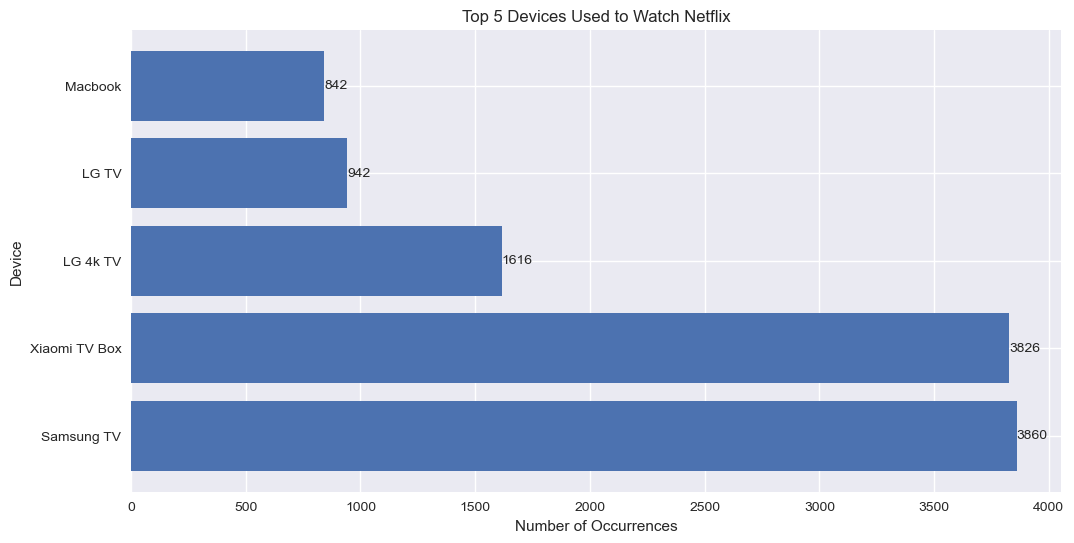

In [54]:
# Define a dictionary to map original device names to new names
device_mapping = {
    'Samsung 2017 Kant-M UHD TV Smart TV': 'Samsung TV',
    'Xiaomi M19 Set Top Box': 'Xiaomi TV Box',
    'LG DTV 2021 MTK LM21U UHD TV Smart TV': 'LG 4k TV',
    'LG 2016 MStar M2 Low DTV Smart TV': 'LG TV',
    'Netflix Chrome MAC (Cadmium) HTML 5': 'Macbook'
}

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
nx_df_copy = nx_df.copy()

# Replace the original device names with the new names in the copied DataFrame
nx_df_copy.loc[:, 'Device Type'] = nx_df_copy['Device Type'].map(device_mapping)

# Count the number of times each device appears
device_counts = nx_df_copy['Device Type'].value_counts()

# Get the top n most frequently used devices
top_n_devices = device_counts.head(5)

# Create a horizontal bar chart of the top n devices
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(top_n_devices.index, top_n_devices.values)

# Set chart title and labels
ax.set_title('Top 5 Devices Used to Watch Netflix')
ax.set_xlabel('Number of Occurrences')
ax.set_ylabel('Device')

# Add data labels
for i, v in enumerate(top_n_devices.head(5).values):
    ax.text(v, i, f'{v:.0f}', va='center')

# Show the chart
plt.show()


### **6.2 The most frequently viewed day of the week on Netflix.**

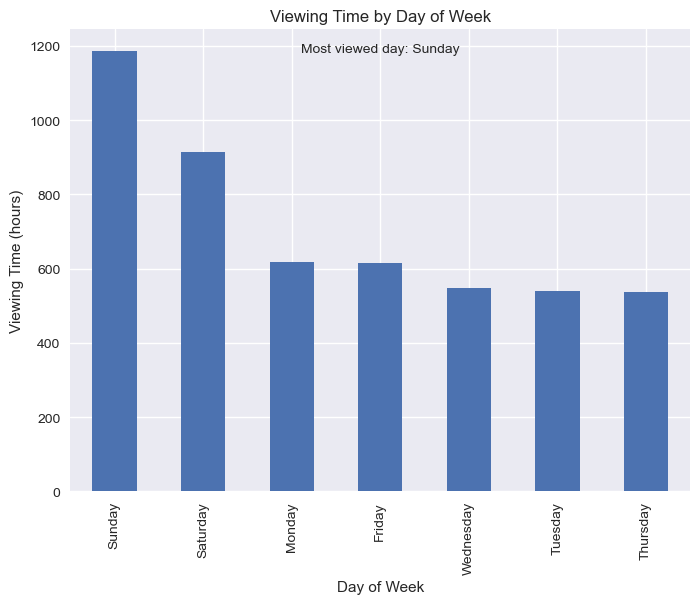

In [64]:
# add a column for the day of the week
nx_df.loc[:, 'Day of Week'] = nx_df['Start Time'].dt.day_name()

# Group the data by day of the week
grouped = nx_df.groupby('Day of Week')

# Sum the duration column to get total viewing time for each day of the week
viewing_times = grouped['Duration'].sum().dt.total_seconds() / 3600

# Find the day of the week with the most viewing time
most_viewed_day = viewing_times.idxmax()

# Sort the dataframe by descending order of viewing times
viewing_times = viewing_times.sort_values(ascending=False)

# Plot a bar chart of the viewing times by day of the week
fig2 = plt.figure(figsize=(8, 6))
viewing_times.plot(kind='bar')
plt.title('Viewing Time by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Viewing Time (hours)')

# Annotate the chart with the most viewed day of the week
plt.annotate(f"Most viewed day: {most_viewed_day}", xy=(0.5, 0.95), xycoords='axes fraction', ha='center')
plt.show()


### **6.3 The peak time of the day for content viewing on Netflix.**

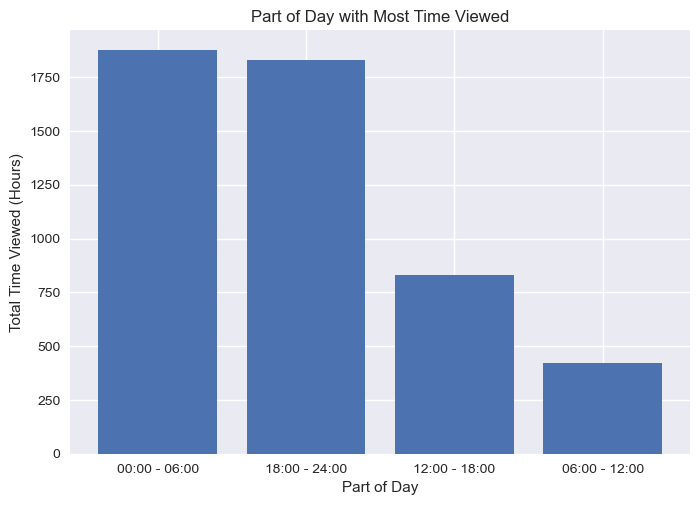

In [66]:
# create a new column with the duration of the content in minutes
nx_df['Duration (H)'] = nx_df['Duration'].dt.total_seconds() / 3600

# extract the hour from the Start Time column
nx_df['Hour'] = nx_df['Start Time'].dt.hour

# create a new column with the part of day based on the hour
conditions = [
    (nx_df['Hour'] >= 6) & (nx_df['Hour'] < 12),
    (nx_df['Hour'] >= 12) & (nx_df['Hour'] < 18),
    (nx_df['Hour'] >= 18) & (nx_df['Hour'] < 24),
    (nx_df['Hour'] >= 0) & (nx_df['Hour'] < 6)
]
values = ['06:00 - 12:00', '12:00 - 18:00', '18:00 - 24:00', '00:00 - 06:00']
nx_df['Part of Day'] = np.select(conditions, values)

# group by part of day and sum the duration of the content viewed
part_of_day_duration = nx_df.groupby('Part of Day')['Duration (H)'].sum()

# sort the data in descending order
part_of_day_duration = part_of_day_duration.sort_values(ascending=False)

# plot a bar chart of the part of day duration
plt.bar(part_of_day_duration.index, part_of_day_duration.values)
plt.title('Part of Day with Most Time Viewed')
plt.xlabel('Part of Day')
plt.ylabel('Total Time Viewed (Hours)')
plt.show()


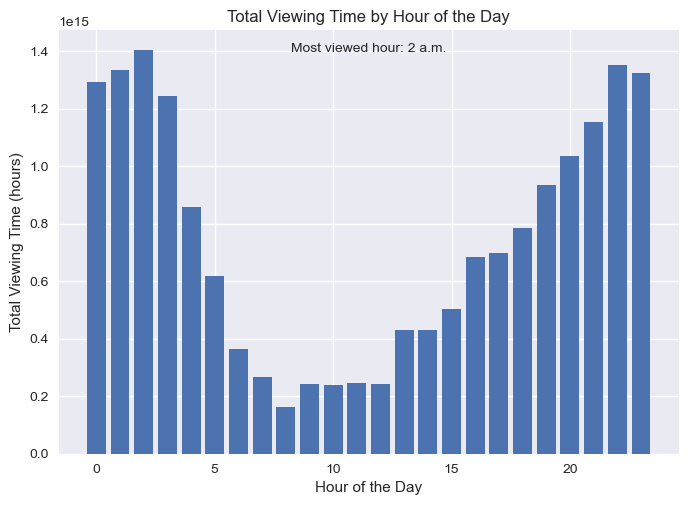

In [57]:
# extract the hour of the day from the Start Time column and add it as a new column to the dataframe
nx_df['Hour'] = nx_df['Start Time'].dt.hour

# group the data by hour and sum the viewing time for each hour
hourly_viewing_times = nx_df.groupby('Hour')['Duration'].sum()

hourly_viewing_times = hourly_viewing_times.sort_values(ascending=False)

most_viewed_hour = hourly_viewing_times.idxmax()

# plot the results as a bar chart
plt.bar(hourly_viewing_times.index, hourly_viewing_times.values)

# add some labels and titles to the plot
plt.title("Total Viewing Time by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Viewing Time (hours)")

# show the plot
plt.annotate(f"Most viewed hour: {most_viewed_hour} a.m.", xy=(0.5, 0.95), xycoords='axes fraction', ha='center')
plt.show()

### **6.4 Analyzing the Average Total Viewing Time per Week for the Past 3 Months on Netflix**

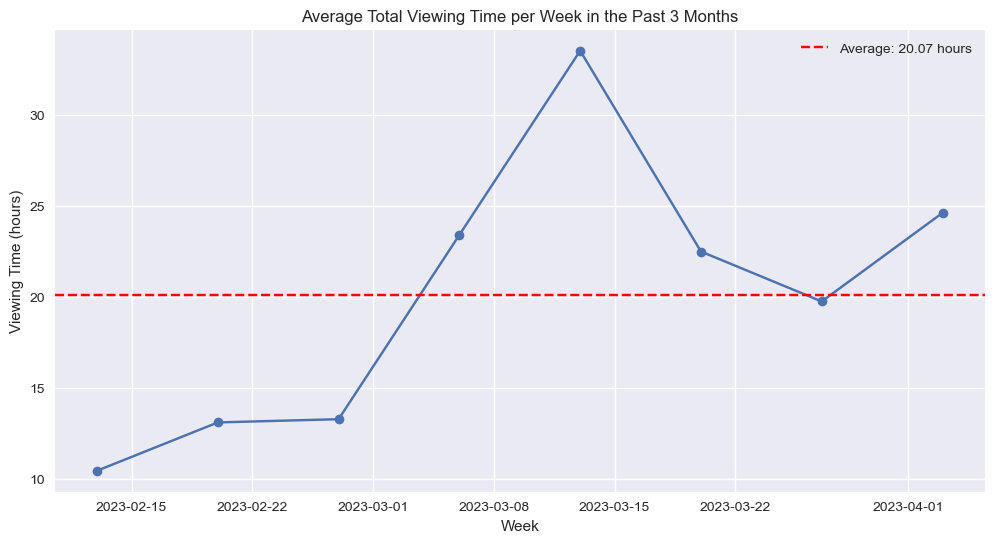

In [58]:
# Filter the data for the past 3 months
three_months_ago = pd.Timestamp.now() - pd.DateOffset(months=5)
nx_df_3m = nx_df[nx_df['Start Time'] >= three_months_ago]

# Group the data by week and sum the total viewing time
weekly_viewing_time = nx_df_3m.resample('W-Mon', on='Start Time')['Duration'].sum()

# Convert viewing time to hours and calculate the average per week
weekly_viewing_time_hours = weekly_viewing_time / pd.Timedelta(hours=1)
average_viewing_time_per_week = weekly_viewing_time_hours.mean()

# Plot the average viewing time per week in a line chart
fig3 = plt.figure(figsize=(12,6))
plt.plot(weekly_viewing_time_hours.index, weekly_viewing_time_hours.values, marker='o')
plt.title('Average Total Viewing Time per Week in the Past 3 Months')
plt.xlabel('Week')
plt.ylabel('Viewing Time (hours)')
plt.axhline(y=average_viewing_time_per_week, color='r', linestyle='--', label=f'Average: {average_viewing_time_per_week:.2f} hours')
plt.legend()
plt.show()


### **6.5 Analyzing the Average Total Viewing Time per Month for the Past 2 Years on Netflix**

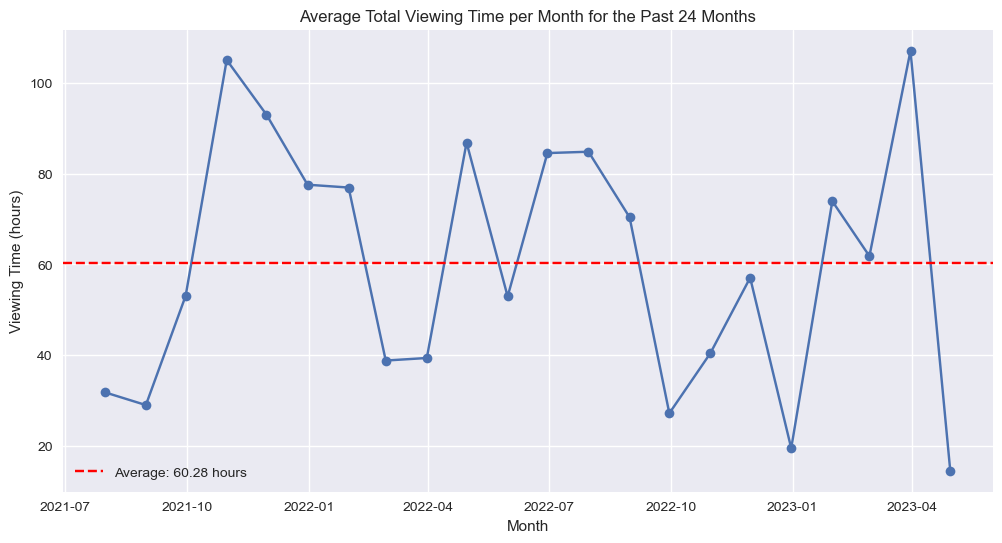

In [59]:
# Filter the data for the past 24 months
two_years_ago = pd.Timestamp.now() - pd.DateOffset(years=2)
nx_df_24m = nx_df[nx_df['Start Time'] >= two_years_ago]

# Group the data by month and sum the total viewing time
monthly_viewing_time = nx_df_24m.resample('M', on='Start Time')['Duration'].sum()

# Convert viewing time to hours and calculate the average per month
monthly_viewing_time_hours = monthly_viewing_time / pd.Timedelta(hours=1)
average_viewing_time_per_month = monthly_viewing_time_hours.mean()

# Plot the average viewing time per month in a line chart
fig = plt.figure(figsize=(12,6))
plt.plot(monthly_viewing_time_hours.index, monthly_viewing_time_hours.values, marker='o')
plt.title('Average Total Viewing Time per Month for the Past 24 Months')
plt.xlabel('Month')
plt.ylabel('Viewing Time (hours)')
plt.axhline(y=average_viewing_time_per_month, color='r', linestyle='--', label=f'Average: {average_viewing_time_per_month:.2f} hours')
plt.legend()
plt.show()


Based on the analysis of viewing habits on Netflix, several conclusions can be drawn. Firstly, the most popular device for watching Netflix is the TV, indicating that I prefer a larger screen experience.

Secondly, when it comes to the most frequently viewed days of the week, Sunday takes the lead, followed by Saturday and surprisingly Monday. This finding challenges the assumption that weekends would be the peak viewing days, highlighting the significance of Mondays in Netflix consumption.

In terms of peak viewing times, two distinct periods emerge: 00:00 to 06:00 and 18:00 to 24:00. This suggests that late-night and evening hours are prime times for content consumption on Netflix.

Furthermore, the analysis reveals that 2 am is the hour of the day with the highest number of hours viewed. This finding indicates a preference for late-night binge-watching.

Examining the past 3 months, the average weekly viewing time amounts to 18.05 hours. This metric provides an understanding of the average content consumption on a weekly basis during this period.

Expanding the analysis to the past 2 years, the average monthly viewing time is found to be 60.28 hours. It is worth noting that, with the exception of a particular month(May, 23), the trend indicates a gradual decrease in viewing time per month since July 22.

Overall, these findings shed light on the viewing habits of Netflix users, highlighting the dominance of TV as the preferred device, the unexpected popularity of Mondays, the importance of late-night and evening viewing periods, and the decline in viewing time over the past 2 years.

## **7. What are the costs?**

For our upcoming analysis, we will focus on the following question related to the cost of Netflix, considering the subscription price change:

* #### **What is the average cost per hour of content viewed per month for the last 2 years?**

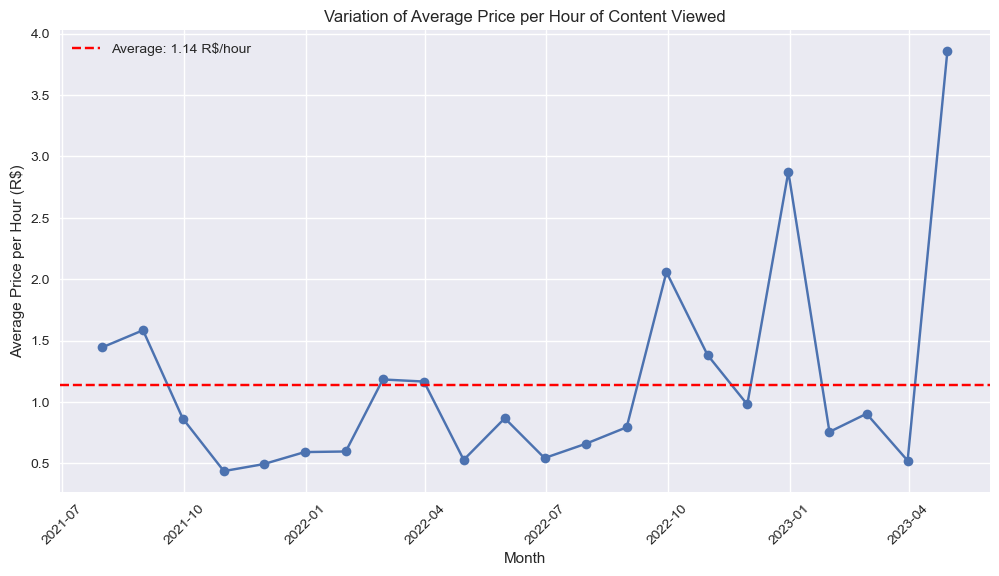

In [60]:
# Define the dates for price change
price_change_date = pd.Timestamp('2022-07-22')

# Calculate the average cost per hour of content viewed in each month
average_cost_per_hour = monthly_viewing_time_hours.copy()
average_cost_per_hour[monthly_viewing_time_hours.index < price_change_date] = 45.90 / monthly_viewing_time_hours[monthly_viewing_time_hours.index < price_change_date]
average_cost_per_hour[monthly_viewing_time_hours.index >= price_change_date] = 55.90 / monthly_viewing_time_hours[monthly_viewing_time_hours.index >= price_change_date]

# Calculate the average cost per hour for the entire period
average_cost_per_hour_period = average_cost_per_hour.mean()

# Plot the variation of average price per hour
fig = plt.figure(figsize=(12, 6))
plt.plot(monthly_viewing_time_hours.index, average_cost_per_hour, marker='o')
plt.axhline(y=average_cost_per_hour_period, color='r', linestyle='--', label=f'Average: {average_cost_per_hour_period:.2f} R$/hour')
plt.title('Variation of Average Price per Hour of Content Viewed')
plt.xlabel('Month')
plt.ylabel('Average Price per Hour (R$)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


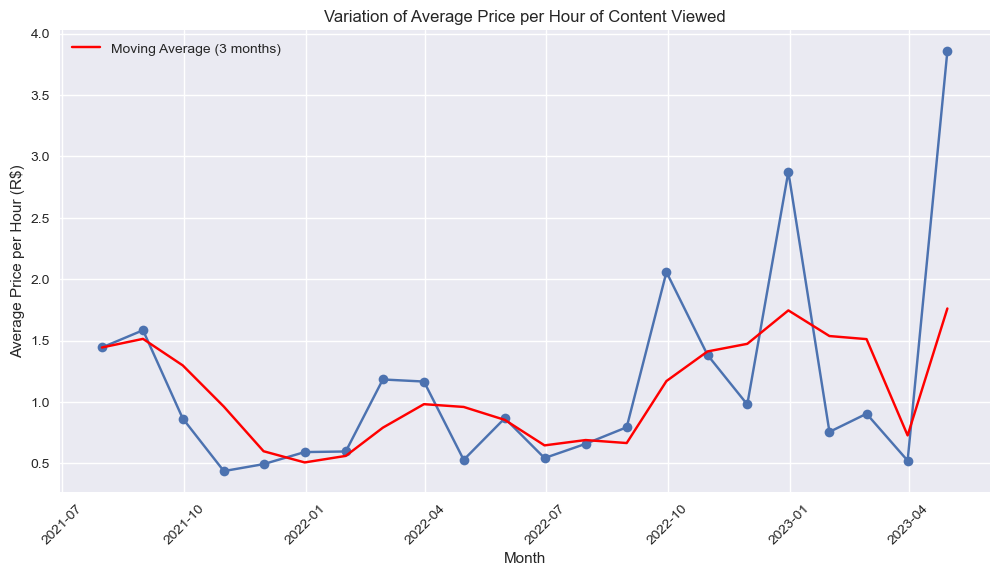

In [61]:
# Define the dates for price change
price_change_date = pd.Timestamp('2022-07-22')

# Calculate the average cost per hour of content viewed in each month
average_cost_per_hour = monthly_viewing_time_hours.copy()
average_cost_per_hour[monthly_viewing_time_hours.index < price_change_date] = 45.90 / monthly_viewing_time_hours[monthly_viewing_time_hours.index < price_change_date]
average_cost_per_hour[monthly_viewing_time_hours.index >= price_change_date] = 55.90 / monthly_viewing_time_hours[monthly_viewing_time_hours.index >= price_change_date]

# Calculate the moving average of the average cost per hour
window_size = 3  # Adjust the window size as desired
moving_average = average_cost_per_hour.rolling(window=window_size, min_periods=1).mean()

# Plot the variation of average price per hour with moving average line
fig = plt.figure(figsize=(12, 6))
plt.plot(monthly_viewing_time_hours.index, average_cost_per_hour, marker='o')
plt.plot(monthly_viewing_time_hours.index, moving_average, color='r', linestyle='-', label=f'Moving Average ({window_size} months)')
plt.title('Variation of Average Price per Hour of Content Viewed')
plt.xlabel('Month')
plt.ylabel('Average Price per Hour (R$)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## **Is it justifiable to continue paying for Netflix?**

Based on the analysis, several factors need to be considered when deciding whether it is worth continuing to pay for Netflix.

Firstly, with the expection of the three last months, the cost per hour of content viewed has been increasing since July 22, as indicated by the upward trend observed in the moving average line. This increase can be attributed to two factors: the rise in subscription prices and the decrease in the number of hours of content viewed.

Furthermore, it is worth noting that while Netflix offers a substantial amount of original content, a significant portion of the viewed content consists of TV shows that are available on other streaming platforms. For example, popular shows like Modern Family (available on Star+), Seinfeld (available on Amazon Prime), and Friends (available on HBO Max) can be found on alternative streaming services.

Taking these factors into consideration, it can be concluded that Netflix may no longer be worth paying for. The increasing cost per hour of content viewed, coupled with the fact that a substantial amount of the content watched is readily available on other platforms, suggests that the value proposition of Netflix has diminished.

Ultimately, individual preferences and viewing habits will play a significant role in determining whether it is worth continuing to subscribe to Netflix. Considering the factors highlighted in the analysis, users may find it beneficial to explore alternative streaming services that offer a wider range of content and more favorable pricing structures.